In [0]:
# imports.
import pandas as pd

In [3]:
yelp = pd.read_json('https://raw.githubusercontent.com/CVanchieri/LambdaSchool-DS-Sprints/master/Sprints/Unit4/Sprint11_CharlesVanchieri/review_sample.json?token=AHYSXEF3ZKJ45CT3KKB34NC6XXBDK', lines=True)
yelp = yelp[['business_id', 'review_id', 'text', 'cool', 'funny', 'useful', 'stars']]
print(yelp.shape)
yelp.head()

(10000, 7)


,business_id,review_id,text,cool,funny,useful,stars
0,nDuEqIyRc8YKS1q1fX0CZg,eZs2tpEJtXPwawvHnHZIgQ,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",1,0,10,1
1,eMYeEapscbKNqUDCx705hg,DoQDWJsNbU0KL1O29l_Xug,Came here for lunch Togo. Service was quick. S...,0,0,0,4
2,6Q7-wkCPc1KF75jZLOTcMw,DDOdGU7zh56yQHmUnL1idQ,I've been to Vegas dozens of times and had nev...,1,1,2,3
3,k3zrItO4l9hwfLRwHBDc9w,LfTMUWnfGFMOfOIyJcwLVA,We went here on a night where they closed off ...,3,4,5,1
4,6hpfRwGlOzbNv7k5eP9rsQ,zJSUdI7bJ8PNJAg4lnl_Gg,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",1,0,5,4


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [0]:
# installs.
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [0]:
# imports.
import re

In [0]:
# keep only letters and numbers.
yelp['text'] = yelp['text'].apply(lambda x: re.sub(r'[^a-zA-Z ^0-9]', '', x))
# remove any special characters. 
yelp['text'] = yelp['text'].apply(lambda x: re.sub(r'(x.[0-9])', '', x))
# remove any forward slashes.
yelp['text'] = yelp['text'].replace('/', ' ') 
#remove additional white spaces.
yelp['text'] = yelp['text'].apply(lambda x: re.sub('  ', ' ', x))
# convert  the text to lowercase.
yelp['text'] = yelp['text'].apply(lambda x: x.lower())

In [0]:
yelp.text[4]

'35 to 4 starsnot bad for the price 1299 for lunch seniors get 15 off pay at the front before eating there are hot food salads noodle bar dessert fruits fried varieties and soupseating in the middle section is a bit too tight but the booths on the side look more spaciousi think the lunch noodle bar would have more variety such as different types of greens vermicelli noodles frozen tofu etc the tomato and laksa broth were both pretty good'

In [0]:
# imports.
import spacy 
from spacy.tokenizer import Tokenizer

In [0]:
# copy the dataframe.
df = yelp.copy()

In [0]:
# set the nlp with "en_core_web_lg" file.
nlp = spacy.load("en_core_web_lg")
# set the tokenizer on nlp.vocab.
tokenizer = Tokenizer(nlp.vocab)

In [0]:
# set the default stop words.
STOP_WORDS = nlp.Defaults.stop_words

In [0]:
# tokenizer pipeline for text removing stop words, blank words and lemmatizing.
tokens = []

for doc in tokenizer.pipe(df['text'], batch_size=500):
    
    doc_tokens = []
    for token in doc:
        if (token.lemma_ not in STOP_WORDS) & (token.text != ' '):
            doc_tokens.append(token.lemma_)

    tokens.append(doc_tokens)
    
# set the new tokens in the data frame.
df['tokens'] = tokens
# show the tokens column.
df['tokens'].head()

0    [beware, fake, fake, fakewe, small, business, ...
1    [come, lunch, togo, service, quick, staff, fri...
2    [ive, vega, dozen, time, step, foot, circus, c...
3    [night, close, street, party, actually, group,...
4    [35, 4, starsnot, bad, price, 1299, lunch, sen...
Name: tokens, dtype: object

In [0]:
# list of tokens from row 4.
df['tokens'][4]

['35',
 '4',
 'starsnot',
 'bad',
 'price',
 '1299',
 'lunch',
 'senior',
 '15',
 'pay',
 'eat',
 'hot',
 'food',
 'salad',
 'noodle',
 'bar',
 'dessert',
 'fruit',
 'fry',
 'variety',
 'soupseating',
 'middle',
 'section',
 'bite',
 'tight',
 'booth',
 'look',
 'spaciousi',
 'think',
 'lunch',
 'noodle',
 'bar',
 'variety',
 'different',
 'type',
 'green',
 'vermicelli',
 'noodle',
 'freeze',
 'tofu',
 'etc',
 'tomato',
 'laksa',
 'broth',
 'pretty',
 'good']

### Word Counter.

In [0]:
# imports.
from collections import Counter

In [0]:
# create a function to count words & stats.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [0]:
# createa a dataframe for the word counts.
wordcount = count(df['tokens'])
# show the dataframe with headers.
wordcount.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
51,good,4046,6480,1.0,0.013363,0.013363,0.4046
122,place,3589,5339,2.0,0.011010,0.024374,0.3589
136,food,3326,4985,3.0,0.010280,0.034654,0.3326
187,great,3086,4254,4.0,0.008773,0.043427,0.3086
1,time,2907,4223,5.0,0.008709,0.052136,0.2907
39,come,2721,3913,6.0,0.008070,0.060205,0.2721
36,like,2653,3842,7.0,0.007923,0.068129,0.2653
49,service,2960,3674,8.0,0.007577,0.075705,0.2960
352,order,2039,3450,9.0,0.007115,0.082820,0.2039
13,try,1921,2555,10.0,0.005269,0.088089,0.1921


In [0]:
# installs.
!pip install squarify
# imports.
import squarify
import matplotlib.pyplot as plt

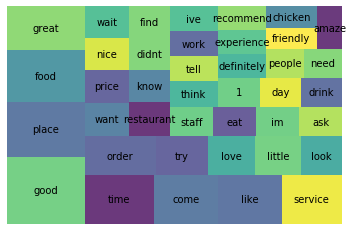

In [0]:
# creat the top 20 words used. 
wordcount_top20 = wordcount[wordcount['rank'] <= 40]
# create squarify plot.
squarify.plot(sizes=wordcount_top20['pct_total'], label=wordcount_top20['word'], alpha=.8 )
# remove axis.
plt.axis('off')
# show the plot.
plt.show()

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

### Nearest Neighbors.

In [0]:
# imports.
from sklearn.neighbors import NearestNeighbors

In [0]:
vects = [nlp(doc).vector for doc in df['text']]

In [0]:
# set the nearest neighbors.
nn = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
# fit the nn on the vects.
nn.fit(vects)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [0]:
# create the fake review.
created_review = """
I love the gluten free food options and the service was really quick too!
"""

In [0]:
# create a vector for the review.
created_review_vect = nlp(created_review).vector

In [0]:
most_similiar = nn.kneighbors([created_review_vect])

In [0]:
# most similiar reviews to the fake review.
yelp.iloc[most_similiar[1][0]]['text']

71      i dont get too adventurous with mexican food b...
4861    this place is soooo cutecame here for sunday b...
8307    this was our first visit to wicked spoon buffe...
6044    skinnyfats is the best place in vegas do you w...
5055    a friend told me about jewels knowing im alway...
425     while it is pricey this place is great for tak...
4074    love the idea awesome having vegan or vegetari...
3071    great food and incredible coffee espresso bar ...
4894    found this place via groupon and wanted to try...
4408    this place is quickly becoming my new favorite...
Name: text, dtype: object

In [0]:
# 10 'similar' reviews.
print('#71')
print(yelp['text'][71][:500])
print('#4861')
print(yelp['text'][4861][:500])
print('#8307')
print(yelp['text'][8307][:500])
print('#6044')
print(yelp['text'][6044][:500])
print('#5055')
print(yelp['text'][5055][:500])
print('#425')
print(yelp['text'][425][:500])
print('#4074')
print(yelp['text'][4074][:500])
print('#3071')
print(yelp['text'][3071][:500])
print('#4894')
print(yelp['text'][4894][:500])
print('#4408')
print(yelp['text'][4408][:500])

#71
i dont get too adventurous with mexican food but i have trouble finding places i like and that my fellow diners like this place is quick and the food is good especially for the price the cheese crisp and sopapillas are great also the service was 5 star very friendly from hi to goodbye
#4861
this place is soooo cutecame here for sunday brunch and it was great make sure you make reservationsthe service was really friendly and quick and the food was delicious i would have liked to see more items on their breakfast menu though way too short and the menu online is not the same as in the restauranthowever i do recommend it here and will return to try their desserts
#8307
this was our first visit to wicked spoon buffet my husband was looking for a buffet that had safe gluten free options we hit the jackpot what an amazing assortment of safe food if something could have cross contamination or be tweaked to be safe they made it personally for you chef katelyn ford was amazing at touring my 

Part2 Answers.

 - the reviews picked up look like most include 'gluten free' and a 'positive' review, was trying to also get 'quick seating' but doesnt seem to show.

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

### TfidfVectorizer with GridSearchCV.

In [0]:
# imports.
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
# set the vector with TfidfVectorizer.
vect = TfidfVectorizer(stop_words=STOP_WORDS)
# set the random forest classifier.
rfc = RandomForestClassifier()

In [0]:
# create the pipeline.
pipe = Pipeline([
                 # vectorizer.
                 ('vect', vect),
                 # classifier.
                 ('clf', rfc)                
                ])

In [0]:
# set the parameters.
parameters = {
    'vect__max_df': ( 0.5, 0.75, 1.0, 1.25, 1.50),
    'vect__min_df': (.01, .03, .05, .07, .09)
    }
# use GRidSearchCV on the pipe and parameters.   
grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
# fit the data on the grid_search.
grid_search.fit(df['text'], df['stars'])

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  7.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [0]:
grid_search.best_score_

0.5825

In [0]:
created_review = [created_review]
# prediction on created review.
pred = grid_search.predict(created_review)
# create a dataframe with created review and predicted stars.
created_review_stars = pd.DataFrame({'text': created_review, 'stars':pred})
created_review_stars['stars'] = created_review_stars['stars'].astype('int64')
# show the dataframe with headers.
created_review_stars.head()

,text,stars
0,\nI love the gluten free food options and the ...,5


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [0]:
# imports.
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim import corpora

In [0]:
# set the dictionary representation of all the words in our corpus.
id2word = corpora.Dictionary(tokens)

In [0]:
# remove extreme values from the dataset.
id2word.filter_extremes(no_below=5, no_above=0.95)

In [0]:
# create bag of words(bow) representation of our corpus.
corpus = [id2word.doc2bow(text) for text in tokens]

In [0]:
# create an lda pipeline.
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 20
                  )

In [0]:
# show the topics generated from the pipeline.
lda.print_topics()

[(0,
  '0.014*"good" + 0.013*"food" + 0.013*"place" + 0.012*"great" + 0.010*"service" + 0.009*"time" + 0.009*"try" + 0.008*"order" + 0.008*"like" + 0.006*"come"'),
 (1,
  '0.012*"good" + 0.011*"place" + 0.011*"like" + 0.009*"come" + 0.009*"food" + 0.009*"time" + 0.008*"great" + 0.006*"service" + 0.006*"order" + 0.006*"price"'),
 (2,
  '0.018*"good" + 0.012*"service" + 0.011*"time" + 0.010*"order" + 0.008*"place" + 0.007*"like" + 0.007*"come" + 0.007*"great" + 0.006*"try" + 0.006*"food"'),
 (3,
  '0.019*"good" + 0.010*"time" + 0.010*"come" + 0.010*"place" + 0.009*"great" + 0.008*"like" + 0.007*"food" + 0.007*"service" + 0.007*"order" + 0.006*"love"'),
 (4,
  '0.015*"food" + 0.014*"good" + 0.010*"place" + 0.009*"come" + 0.008*"time" + 0.007*"try" + 0.007*"like" + 0.007*"great" + 0.007*"love" + 0.006*"want"'),
 (5,
  '0.015*"place" + 0.013*"good" + 0.011*"service" + 0.010*"like" + 0.010*"great" + 0.010*"come" + 0.009*"time" + 0.008*"food" + 0.007*"order" + 0.007*"love"'),
 (6,
  '0.015*"p

In [0]:
# imports.
import re
# set all the words.
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [0]:
# create titles from names column.
titles = df['text']

In [0]:
# create the topics, wtih 5 words.
topics = [' '.join(t[0:5]).strip().replace('\n', '') for t in words]

In [0]:
# show the topics.
topics

['good food place great service',
 'good place like come food',
 'good service time order place',
 'good time come place great',
 'food good place come time',
 'place good service like great',
 'place good like time come',
 'place good food time like',
 'food good place time great',
 'good food time great place',
 'good place time great come',
 'great place good food time',
 'food place good like great',
 'food good like service come',
 'good great place time food',
 'good food place time come',
 'good place great like service',
 'good food time place come',
 'good time food place order',
 'good place like come food']

In [0]:
# set the distro with lda.
distro = [lda[d] for d in corpus]
# create a function that fills in list with the empty values.
def update(doc):
        d_dist = {k:0 for k in range(0,14)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
# create new distro from the function.    
new_distro = [update(d) for d in distro]

In [0]:
# create the new dataframe with new_distro & yelp.index.
new_df = pd.DataFrame.from_records(new_distro, index=yelp.index)
# set the columns to the topics.
new_df.columns = topics
# set the df.stars to = the yelp.stars.
new_df['stars'] = yelp['stars']

In [0]:
# show the dataframe with headers.
new_df.head()

,good food place great service,good place like come food,good service time order place,good time come place great,food good place come time,place good service like great,place good like time come,place good food time like,food good place time great,good food time great place,good place time great come,great place good food time,food place good like great,food good like service come,good great place time food,good food place time come,good place great like service,good food time place come,good time food place order,good place like come food,stars
0,0.070959,0.000000,0.071701,0.034754,0.033291,0.075430,0.032560,0.136328,0.025268,0.101529,0.059420,0.049782,0.041675,0.028329,0.022706,0.049547,0.021225,0.093767,0.043294,NaN,1
1,0.048304,0.000000,0.288553,0.000000,0.000000,0.012752,0.000000,0.000000,0.041296,0.053626,0.019543,0.021628,0.083450,0.073879,NaN,NaN,0.018496,0.021658,0.178344,0.096209,4
2,0.018775,0.063969,0.046656,0.017071,0.045886,0.128474,0.069789,0.043350,0.037979,0.071912,0.050447,0.055141,0.000000,0.025197,0.098060,0.043902,0.040605,0.033371,0.067721,0.032263,3
3,0.038462,0.000000,0.017983,0.011035,0.000000,0.000000,0.117826,0.040324,0.000000,0.000000,0.255904,0.132383,0.000000,0.000000,0.066102,0.094396,NaN,NaN,0.177673,NaN,1
4,0.030696,0.034998,0.029093,0.066162,0.094639,0.025043,0.078682,0.031585,0.041212,0.030355,0.046708,0.027104,0.039460,0.079820,0.038902,0.021808,0.050037,0.022146,0.126084,0.085464,4


Create 1-2 visualizations of the results

### Topic Distance Visualizations.

In [0]:
# installs.
!pip install --upgrade pip
!pip install pyLDAvis

In [0]:
# imports.
import pyLDAvis
import pyLDAvis.gensim

In [0]:
# enable the notebook.
pyLDAvis.enable_notebook()
# prepare graph with lda, corpus, id2word.
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.004115 -0.004134       1        1  5.976971
13     0.001395 -0.004482       2        1  5.478884
11     0.008137  0.001288       3        1  5.432713
0      0.003339  0.000278       4        1  5.237164
3     -0.001218 -0.002147       5        1  5.199857
8      0.003139  0.001867       6        1  5.164645
19    -0.003480 -0.002038       7        1  5.164290
6     -0.000145 -0.000093       8        1  5.136539
5     -0.000269 -0.001682       9        1  5.134936
2     -0.003396 -0.004984      10        1  5.082320
7     -0.002391  0.002135      11        1  5.000279
16    -0.001310 -0.001870      12        1  4.982314
4     -0.001738  0.003273      13        1  4.877885
18    -0.000020  0.000526      14        1  4.828508
12     0.001707  0.000440      15        1  4.807343
10    -0.002457  0.002100      16        1  4.694231
1     -0.001135  0.000199      17        1  4.570659
9      0.000962  0.004648      18        1  4.481727
17    -0.002044  0.002034      19        1  4.397079
15    -0.003192  0.002639      20        1  4.351663, topic_info=    Category         Freq   Term        Total  loglift  logprob
135  Default  4844.000000   food  4844.000000  30.0000  30.0000
188  Default  4259.000000  great  4259.000000  29.0000  29.0000
32   Default  4219.000000   time  4219.000000  28.0000  28.0000
16   Default  3739.000000   like  3739.000000  27.0000  27.0000
120  Default  5227.000000  place  5227.000000  26.0000  26.0000
..       ...          ...    ...          ...      ...      ...
44   Topic20    69.229858  staff  1572.007690   0.0119  -5.6360
275  Topic20    71.937065   want  1809.126099  -0.0902  -5.5977
597  Topic20    76.936920   love  2221.822021  -0.2285  -5.5305
170  Topic20    64.078873     ﻿1  1477.252075  -0.0032  -5.7133
442  Topic20    64.249550   tell  1519.767578  -0.0289  -5.7107

[1609 rows x 6 columns], token_table=      Topic      Freq Term
term                      
124       1  0.048759   15
124       2  0.052241   15
124       3  0.041793   15
124       4  0.038310   15
124       5  0.055724   15
...     ...       ...  ...
170      16  0.064986   ﻿1
170      17  0.046708   ﻿1
170      18  0.045354   ﻿1
170      19  0.051447   ﻿1
170      20  0.043324   ﻿1

[10908 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 14, 12, 1, 4, 9, 20, 7, 6, 3, 8, 17, 5, 19, 13, 11, 2, 10, 18, 16])

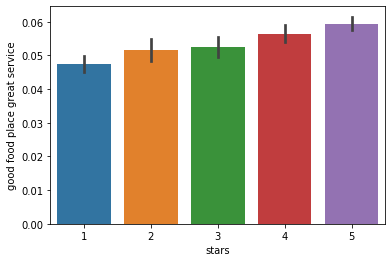

In [0]:
# imports.
import seaborn as sns

# show barplot of stars  for a topic.
sns.barplot(x="stars", y=topics[0], data=new_df)

### Selecting the Number of Topics.

In [0]:
# create function to compute coherence values.
def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    for iter_ in range(passes):
      for num_topics in range(start, limit, step):
          model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
          coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
          coherence_values.append({'pass': iter_, 
                                    'num_topics': num_topics, 
                                    'coherence_score': coherencemodel.get_coherence()
                                  })

    return coherence_values

In [0]:
# imports.
from gensim.models.coherencemodel import CoherenceModel

In [0]:
# takes a long time to run.

# set the coherence values with the function.
coherence_values = compute_coherence_values(dictionary=id2word, 
                                            corpus=corpus, 
                                            limit=20)

In [0]:
# create a new dataframe from the coherence values.
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [0]:
# show the dataframe with headers.
topic_coherence.head()

,pass,num_topics,coherence_score
0,0,2,-1.587279
1,0,5,-1.666087
2,0,8,-1.631252
3,0,11,-1.680356
4,0,14,-1.675922


In [0]:
# imports.
import seaborn as sns 

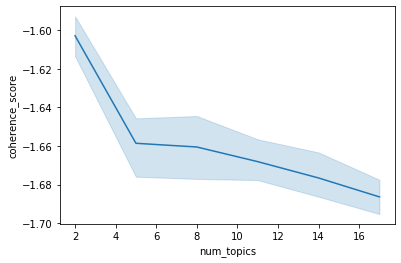

In [0]:
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

In [0]:
# show the initial value of lda corpus.
lda[corpus[0]]

[(0, 0.06408937),
 (1, 0.015538651),
 (2, 0.060261343),
 (3, 0.025156572),
 (4, 0.06778793),
 (5, 0.04960371),
 (6, 0.047723006),
 (7, 0.11869844),
 (8, 0.048870493),
 (9, 0.04507991),
 (10, 0.07231302),
 (11, 0.031215055),
 (12, 0.028670868),
 (13, 0.019532308),
 (14, 0.014329433),
 (15, 0.046756856),
 (16, 0.025311504),
 (18, 0.15165496),
 (19, 0.059313238)]

### Part 4 Answers.

 - Would have been cool to have business names so we could actually see who the reivew is for, could have helped make more sense.
 - pyLDAvis graph shows us the words used within each topic cluster, pretty cool visualization tool.
 - The coherence score/visual gives us an idea of how many topics we should use, 14.
 - Basically we have produced clusters of similar words based off of the model made, then in the dataframe the clusters are corresponding to the businesses being reviewd.
 - Seems to be a lot of positive reviews.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)